# Исследовательский анализ данных

### Анализ первичной информации

In [ ]:
#Открываем файл с данными
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep ='\t')
old_data = pd.read_csv('/datasets/real_estate_data.csv', sep ='\t')
#Импортируем библиотеку matpotlib для создания графиков
import matplotlib.pyplot as plt

In [ ]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [ ]:
#Смотрим общую информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

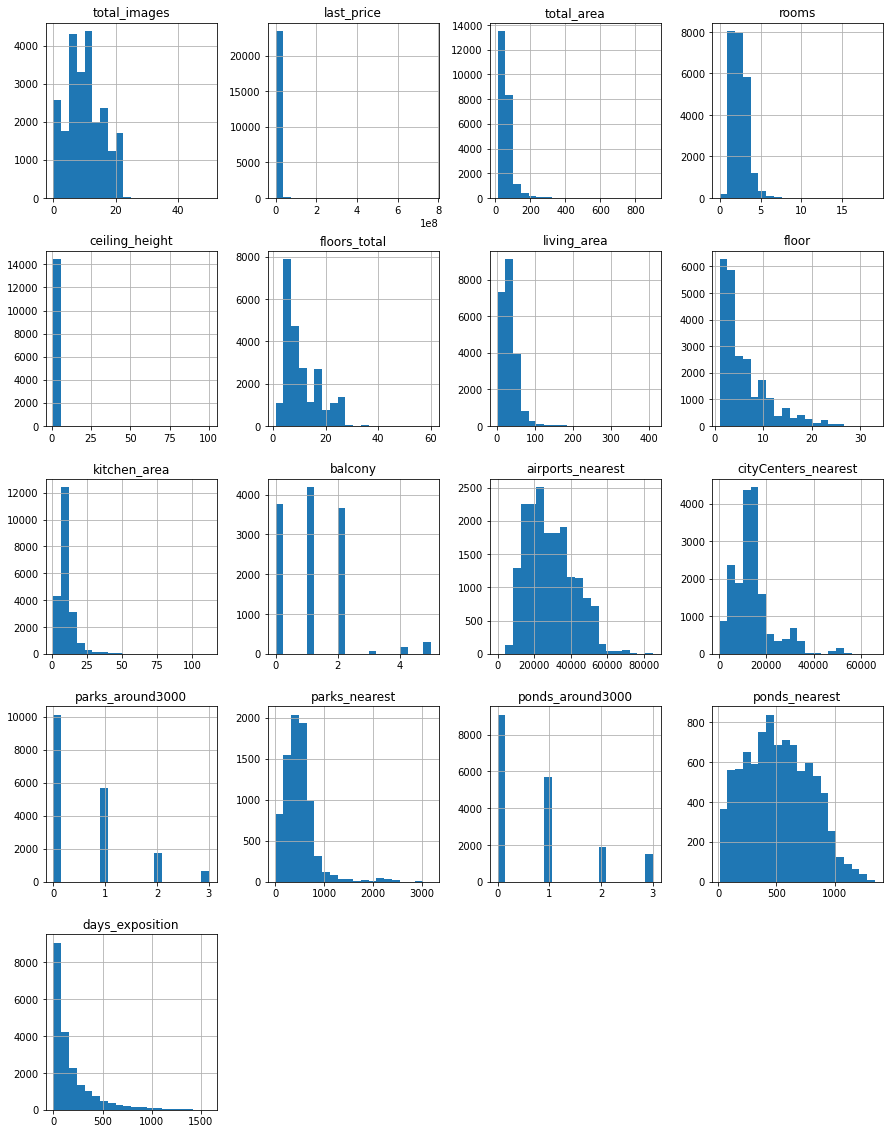

In [ ]:
#строим общую гистограмму для всех числовых столбцов таблицы.

data.hist(figsize=(15, 20), bins=20)
plt.show()

### Предобработка данных

In [ ]:
#Определяем, в каких столбцах есть пропуски.
data.isna().sum()


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [ ]:
#Заполните пропущенные значения там, где это возможно.
data['balcony'] = data['balcony'].fillna(0)

Заменяем все пропуски балконов, на 0, так скорее всего если их нет, то не указали.

In [ ]:
#Заполните пропущенные значения там, где это возможно.
data['is_apartment'] = data['is_apartment'].fillna(False)


Заменяем все пропуски апартаментов, на False, так скорее всего если их нет, то не указали.

In [ ]:
#Смотрим дубликаты в locality_name
data['locality_name'].sort_values(ascending=False).unique()



array(['село Шум', 'село Старая Ладога', 'село Русско-Высоцкое',
       'село Рождествено', 'село Путилово', 'село Паша', 'село Павлово',
       'село Никольское', 'село Копорье', 'садовое товарищество Садко',
       'садовое товарищество Рахья', 'садовое товарищество Приладожский',
       'садовое товарищество Новая Ропша',
       'садоводческое некоммерческое товарищество Лесная Поляна',
       'посёлок станции Свирь', 'посёлок станции Громово',
       'посёлок при железнодорожной станции Приветнинское',
       'посёлок при железнодорожной станции Вещево',
       'посёлок городского типа имени Свердлова',
       'посёлок городского типа имени Морозова',
       'посёлок городского типа Форносово',
       'посёлок городского типа Ульяновка',
       'посёлок городского типа Токсово', 'посёлок городского типа Тайцы',
       'посёлок городского типа Сиверский',
       'посёлок городского типа Рябово', 'посёлок городского типа Рощино',
       'посёлок городского типа Павлово', 'посёлок гор

В данных присутсвтует различное написание схожих значений, например посёлок указан в нескольких вариантах:городской посёлок, поселок городского типа итд. Такое написание обсуловлено человеческих фактором, так как люди указывают привычных для них образом.

In [ ]:
#чистим неявные дубликаты через список и цикл
to_replace = ["городской посёлок", "поселок городского типа", "поселок", \
              "городской поселок", "коттеджный посёлок", "коттеджный поселок", "поселокгородского типа"   ]
replacement = 'посёлок'
for i in to_replace:
    data['locality_name'] = data['locality_name'].str.replace(i, replacement)

data['locality_name'].unique()


array(['Санкт-Петербург', 'посёлок Шушары', 'посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'посёлок Красный Бор', 'Гатчина', 'деревня Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'посёлок Металлострой', 'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'посёлок Молодцово',
       'посёлок Кузьмоловский', 'садовое товарищество Новая Ропша',
       'Павловск', 'деревня Пикколово', 'Всеволожск', 'Волхов',
       'Кингисепп', 'Приозерск', 'Сестрорецк', 'деревня Куттузи',
       'посёлок Аннино', 'посёлок Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'посёлок Торковичи', 'посёлок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбур

In [ ]:
#удаляем 49 неопределенных локаций
data = data.dropna(subset=['locality_name'])

In [ ]:
#есть потолки с анамальным значением 24,25,27 и т.д. метров, скорее всего это ошибка формата
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Есть потолки которые привышают 10 метров, скокорее всего это ошибка вводна данных

In [ ]:
#с помощью функции loc извлекаем данные по потолкам более 10 метров и приводим их к нормальному виду за счет деления на 10
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = data['ceiling_height']/10
data['ceiling_height'].sort_values().unique()

array([ 1.  ,  1.03,  1.2 ,  1.4 ,  1.75,  2.  ,  2.2 ,  2.25,  2.26,
        2.3 ,  2.34,  2.4 ,  2.45,  2.46,  2.47,  2.48,  2.49,  2.5 ,
        2.51,  2.52,  2.53,  2.54,  2.55,  2.56,  2.57,  2.58,  2.59,
        2.6 ,  2.61,  2.62,  2.63,  2.64,  2.65,  2.66,  2.67,  2.68,
        2.69,  2.7 ,  2.71,  2.72,  2.73,  2.74,  2.75,  2.76,  2.77,
        2.78,  2.79,  2.8 ,  2.81,  2.82,  2.83,  2.84,  2.85,  2.86,
        2.87,  2.88,  2.89,  2.9 ,  2.91,  2.92,  2.93,  2.94,  2.95,
        2.96,  2.97,  2.98,  2.99,  3.  ,  3.01,  3.02,  3.03,  3.04,
        3.05,  3.06,  3.07,  3.08,  3.09,  3.1 ,  3.11,  3.12,  3.13,
        3.14,  3.15,  3.16,  3.17,  3.18,  3.2 ,  3.21,  3.22,  3.23,
        3.24,  3.25,  3.26,  3.27,  3.28,  3.29,  3.3 ,  3.31,  3.32,
        3.33,  3.34,  3.35,  3.36,  3.37,  3.38,  3.39,  3.4 ,  3.42,
        3.43,  3.44,  3.45,  3.46,  3.47,  3.48,  3.49,  3.5 ,  3.51,
        3.52,  3.53,  3.54,  3.55,  3.56,  3.57,  3.58,  3.59,  3.6 ,
        3.62,  3.63,

In [ ]:
#правим все потолки менее 2 метров на медианное значение
data.loc[(data['ceiling_height'] <= 2) , 'ceiling_height' ] = data['ceiling_height'].median()

In [ ]:
#Заменяем все пропуски высоты потолка, на медианное значение
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].sort_values().unique()

array([ 2.2 ,  2.25,  2.26,  2.3 ,  2.34,  2.4 ,  2.45,  2.46,  2.47,
        2.48,  2.49,  2.5 ,  2.51,  2.52,  2.53,  2.54,  2.55,  2.56,
        2.57,  2.58,  2.59,  2.6 ,  2.61,  2.62,  2.63,  2.64,  2.65,
        2.66,  2.67,  2.68,  2.69,  2.7 ,  2.71,  2.72,  2.73,  2.74,
        2.75,  2.76,  2.77,  2.78,  2.79,  2.8 ,  2.81,  2.82,  2.83,
        2.84,  2.85,  2.86,  2.87,  2.88,  2.89,  2.9 ,  2.91,  2.92,
        2.93,  2.94,  2.95,  2.96,  2.97,  2.98,  2.99,  3.  ,  3.01,
        3.02,  3.03,  3.04,  3.05,  3.06,  3.07,  3.08,  3.09,  3.1 ,
        3.11,  3.12,  3.13,  3.14,  3.15,  3.16,  3.17,  3.18,  3.2 ,
        3.21,  3.22,  3.23,  3.24,  3.25,  3.26,  3.27,  3.28,  3.29,
        3.3 ,  3.31,  3.32,  3.33,  3.34,  3.35,  3.36,  3.37,  3.38,
        3.39,  3.4 ,  3.42,  3.43,  3.44,  3.45,  3.46,  3.47,  3.48,
        3.49,  3.5 ,  3.51,  3.52,  3.53,  3.54,  3.55,  3.56,  3.57,
        3.58,  3.59,  3.6 ,  3.62,  3.63,  3.65,  3.66,  3.67,  3.68,
        3.69,  3.7 ,

In [ ]:
#display(data[data['floors_total'].isna()])
#было предположение, что количество этажей не указано в загородной недвижимости, но это не подтвердилось,
#так как в данных есть этаж самого объекта и это в большинстве случаев не 1 или 2 этаж

In [ ]:
#Переводим данные из столбца first_day_exposition в формат даты и времени,
#для последующего создания столбцов по дням недели,месяцам и годам
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Данные first_day_exposition указаны в офрмате oject, для дальнейшей работы их необходимо перевести в datetime

In [ ]:
#проверяем наличие дубликатов
display(data[data.duplicated()])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [ ]:
data['kitchen_area'].isna().sum()

2269

In [ ]:
#пропуски по кухне заполним через цикл

for room in data['rooms'].unique():
    data.loc[(data['rooms'] == room) & (data['kitchen_area'].isna()), 'kitchen_area'] =\
    data.loc[(data['rooms'] == room), 'kitchen_area'].mean()

# смотрим все ли пропуски заполнились
display(data[data['kitchen_area'].isna()])

#осталось часть незаолненнх значений, где кол-во комнат = 0 , там заполним медианой
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,2.65,24.0,15.50,2,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27,0,2.65,14.0,17.00,1,False,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12,0,2.65,17.0,24.75,4,False,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28,0,2.65,26.0,24.30,19,False,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20,0,2.65,10.0,NaN,7,False,...,NaN,0.0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01,0,2.65,25.0,18.00,16,False,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28,0,2.65,24.0,18.00,4,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07,0,2.65,19.0,NaN,8,False,...,NaN,0.0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11,0,2.65,9.0,18.00,8,False,...,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


In [ ]:
#Удлаляем пропуски в floors_total, так восстановить их невозможно, а их доля крайне низкая
data = data.dropna(subset=['floors_total'])
#переводим floors_total из float в int , так как этажи целые
data['floors_total'] = data['floors_total'].astype('int')

In [ ]:
#добавляем в таблицу стоимость м2
data['metr_cost'] = data['last_price'] / data['living_area']
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metr_cost
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,254901.960784
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,180107.526882
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,151486.880466
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,NaN,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,312500.000000
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,0.0,посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,200694.444444
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,349056.603774
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,NaN,22,False,...,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,187945.560596
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,123853.211009


In [ ]:
#добавляем в таблицу дни недели (0 — понедельник, 1 — вторник и так далее)
data['day'] = pd.DatetimeIndex(data['first_day_exposition']).weekday

In [ ]:
#добавляем в таблицу месяца
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [ ]:
#добавляем в таблицу месяца
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year


In [ ]:
#функция для строки с возратом типа этажа («первый», «последний», «другой»)
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor ==1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

#добавление нового столбца и вызов функиции , где для входя используются строки
data['floor_type'] = data.apply(floor_type , axis=1)


In [ ]:
#расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)
data['center_km'] = round(data['cityCenters_nearest']/1000)

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metr_cost,day,month,year,floor_type,center_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,482.0,2.0,755.0,NaN,254901.960784,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,NaN,0.0,NaN,81.0,180107.526882,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,90.0,2.0,574.0,558.0,151486.880466,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,NaN,9,False,...,84.0,3.0,234.0,424.0,NaN,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,112.0,1.0,48.0,121.0,312500.000000,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,NaN,NaN,NaN,55.0,200694.444444,0,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,NaN,0.0,NaN,155.0,349056.603774,3,11,2017,другой,19.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,NaN,22,False,...,NaN,0.0,NaN,NaN,NaN,3,4,2019,другой,12.0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,NaN,NaN,NaN,189.0,187945.560596,2,5,2018,другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,NaN,0.0,NaN,289.0,123853.211009,6,2,2017,другой,15.0


In [ ]:
#переводим цену в млн, для удобства просмора
data['last_price_mln'] = round(data['last_price']/1000000)

In [ ]:
#Удаляем объекты с ценой более 100млн, так как они являются выбросами и их всего 37 штук.
data = data.drop(index=data.query('last_price_mln > 100').index)

In [ ]:
#Удаляем объекты с ценой мене 12190.0 р, так как он похож на ошибку из-за метража 109м2 и находж
data = data.drop(index=data.query('last_price < 13000').index)

In [ ]:
#Удаляем объекты с жилой площдаью менее 9м2 по ГОСТу
data = data.drop(index=data.query('living_area < 9').index)

In [ ]:
data.query('rooms == 3')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,metr_cost,day,month,year,floor_type,center_km,last_price_mln
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,2.0,755.0,NaN,254901.960784,3,3,2019,другой,16.0,13.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,NaN,9,False,...,3.0,234.0,424.0,NaN,4,7,2015,другой,7.0,65.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.6,7,False,...,0.0,NaN,289.0,123853.211009,6,2,2017,другой,15.0,5.0
16,11,6700000.0,82.00,2017-11-23,3,3.05,5,55.6,1,False,...,0.0,NaN,397.0,120503.597122,3,11,2017,первый,11.0,7.0
19,16,14200000.0,121.00,2019-01-09,3,2.75,16,76.0,8,False,...,0.0,NaN,97.0,186842.105263,2,1,2019,другой,13.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23680,14,5000000.0,59.00,2019-04-04,3,2.50,5,52.0,1,False,...,0.0,NaN,NaN,96153.846154,3,4,2019,первый,12.0,5.0
23688,19,9200000.0,101.00,2019-04-01,3,3.05,15,63.0,12,False,...,0.0,NaN,23.0,146031.746032,0,4,2019,другой,14.0,9.0
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.0,8,False,...,1.0,675.0,239.0,115000.000000,4,8,2016,другой,34.0,5.0
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,3.0,381.0,NaN,132332.878581,1,3,2017,другой,4.0,10.0


In [ ]:
#сравниваем размеры двух датафреймов
data.shape[0] / old_data.shape[0]

0.992151567576691

### Проводим исследовательский анализ данных

In [ ]:
#Импортируем библиотеку matpotlib для создания графиков
import matplotlib.pyplot as plt

count    23513.000000
mean        59.905365
std         33.461265
min         12.000000
25%         40.000000
50%         52.000000
75%         69.500000
max        590.000000
Name: total_area, dtype: float64

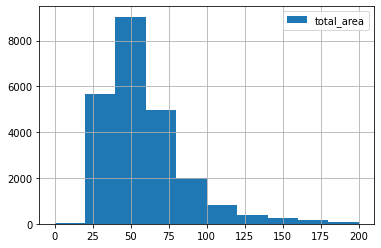

In [ ]:
#Анализируем следующие параметры объектов: общая площадь
data['total_area'].hist(range=(0,200), legend=True)
data['total_area'].describe()

Наибольшее количество объектов имеют площадь 50-60 м2, таких объявлений более 8 тыс. и они формируют пик гистограммы.
у гистограммы высокое стандартное отклонение в рузльтате присутсвия в данных более 100 квартир площадкью свыше 175м2

count    21653.000000
mean        34.266097
std         21.181791
min          9.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        409.000000
Name: living_area, dtype: float64

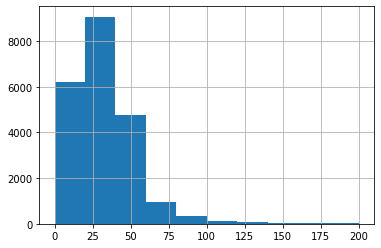

In [ ]:
#Анадизируем жилую площадь;
data['living_area'].hist(range=(0,200))
data['living_area'].describe()

Наибольшее кол-во объектов имеют жилую площадь в диапозоне 20-40 м2, таких объектов более 10тыс и они формируют пик гистограммы

count    21299.000000
mean        10.512941
std          5.732918
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

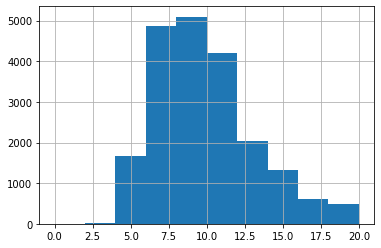

In [ ]:
#Анадизируем площадь кухни;
data['kitchen_area'].hist(range=(0,20))
data['kitchen_area'].describe()

Для большинства объявлений средняя площадь кухни находится в диапозоне от 9 до 10 метров, что соответсвтует стандартнам типовых домов в РФ

count    23513.000000
mean         6.247225
std          6.428990
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         99.000000
Name: last_price_mln, dtype: float64

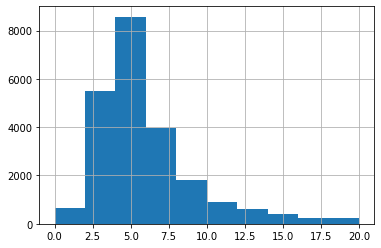

In [ ]:
#Анадизируем цену объекта;
data['last_price_mln'].hist(range=(0,20))
data['last_price_mln'].describe()

Средняя стоимость квартиры 5 млн. Объектов с такой ценой больше всего и они формируют пик гистограммы

count    23513.000000
mean         2.066091
std          1.069650
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

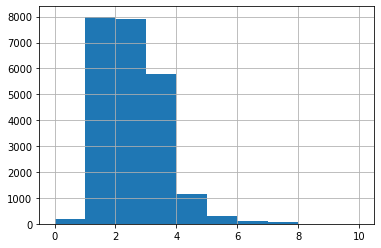

In [ ]:
#Анадизируем количество комнат
data['rooms'].hist(range=(0,10))
data['rooms'].describe()

В объявлениях наиболее часто встречаются 1 и 2 квартиры. Средние значения (ср. ариф и медиана) также находятся на уровене 2.
В данных есть также квартиры без комнат, предполагаю что это студии.

count    23513.000000
mean         2.697383
std          0.233151
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

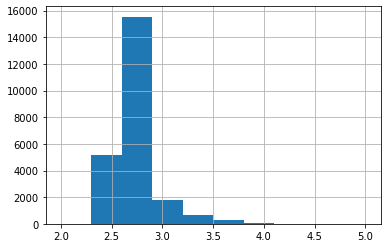

In [ ]:
#Анадизируем высоту потолков
data['ceiling_height'].hist(range=(2,5))
data['ceiling_height'].describe()

Средняя высота потолка 2,65 , что соответсвует стандартам строительства жилой недивжимости.

count    23513.000000
mean         5.875771
std          4.869119
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

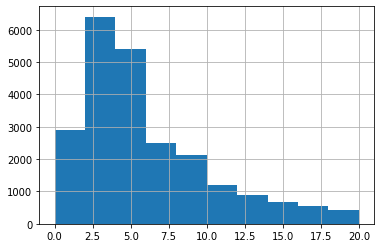

In [ ]:
#Анадизируем этаж квартиры;
data['floor'].hist(range=(0,20))
data['floor'].describe()

со 2 по 6 это самые часто встречающиеся этажи в окубликованных объявлениях

count      23513
unique         3
top       другой
freq       17294
Name: floor_type, dtype: object

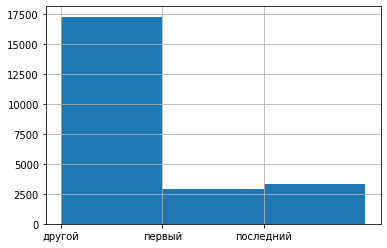

In [ ]:
#Анадизируем тип этажа квартиры («первый», «последний», «другой»);
data['floor_type'].hist(range=(0,3), bins=3)
data['floor_type'].describe()

Меньше всего объявлений на первых этажах их доля составялет около 10% от всех объявлений.

count    23513.000000
mean        10.678986
std          6.594921
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

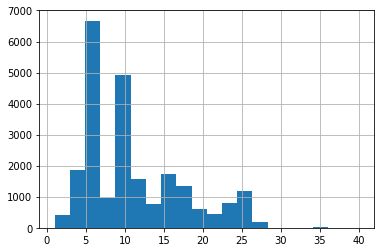

In [ ]:
#Анадизируем общее количество этажей в доме
data['floors_total'].hist(range=(1,40), bins=20)
data['floors_total'].describe()

У гистограммы неколько пиков, что является результатом типичной застроки : дома 5 этажей , 9-10 этажные и 16 этажные.

count    18014.000000
mean        14.208727
std          8.619092
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: center_km, dtype: float64

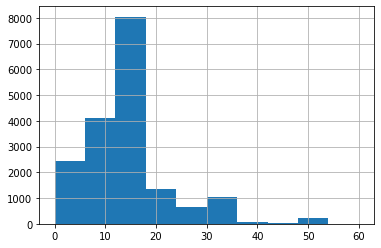

In [ ]:
#Анадизируем расстояние до центра города в метрах;
data['center_km'].hist(range=(0,60))
data['center_km'].describe()

Наибольшее количество объявлений имеют удаленность о центра в среднем на 13-14км

count    17991.000000
mean     28803.460619
std      12646.090942
min          0.000000
25%      18551.000000
50%      26763.000000
75%      37310.000000
max      84869.000000
Name: airports_nearest, dtype: float64

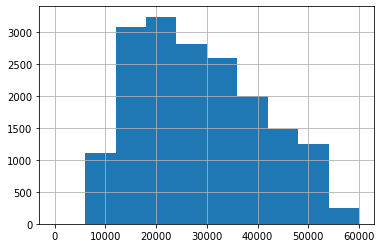

In [ ]:
#Анадизируем расстояние до ближайшего аэропорта;
data['airports_nearest'].hist(range=(0,60000))
data['airports_nearest'].describe()

Наибольшее кол-во объектов находятся в 20 км от аэропорта

count    7995.000000
mean      490.860663
std       342.047582
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

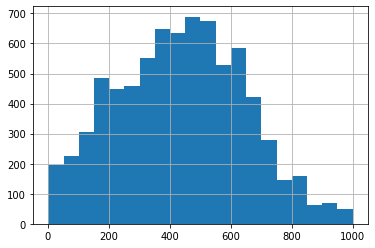

In [ ]:
#Анадизируем расстояние до ближайшего парка;
data['parks_nearest'].hist(range=(1,1000),bins=20)
data['parks_nearest'].describe()

Наибольшее кол-во объектов находятся в 500 метраз от парка

count    23513.000000
mean         2.567346
std          1.788322
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day, dtype: float64

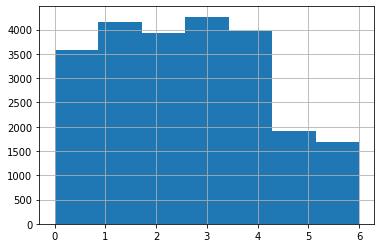

In [ ]:
#Анадизируем день и месяц публикации объявления.
data['day'].hist(range=(0,6), bins=7)
data['day'].describe()

Наиболее часто объявления публикуются по четвергам. Меньше всего по понедельникам и выходным.

count    23513.000000
mean         6.403351
std          3.493216
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

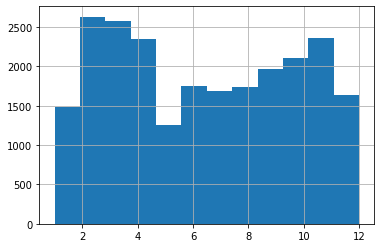

In [ ]:
data['month'].hist(range=(1,12), bins=12)
data['month'].describe()

Период с марта по май явялется самым активным периодом продаж, так как в этот период публикутся большая часть объявлений

count    20349.000000
mean       180.534031
std        219.615699
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

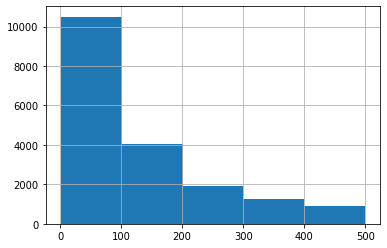

In [ ]:
data['days_exposition'].hist(range=(1,500), bins=5)
data['days_exposition'].describe()

Большинство объявлений продаются в течение 100 дней

0.7689248270435748


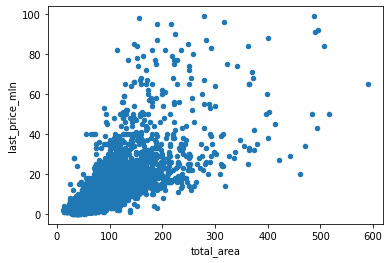

In [ ]:
#Анализурем зависит ли цена от общей площади;
data.plot(x='total_area', y='last_price_mln', kind='scatter')
print(data['last_price_mln'].corr(data['total_area']))

Есть высокая корреляция между площадью квартиры и ценой. т.е. при увеличение площади растет и стоимость.

0.6850949979112962


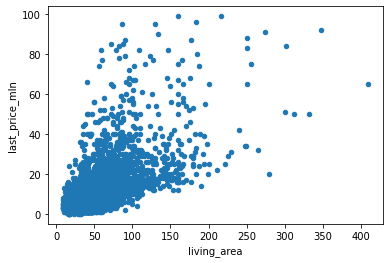

In [ ]:
#Анализурем зависит ли цена от жилой площади;
data.plot(x='living_area', y='last_price_mln', kind='scatter')
print(data['last_price_mln'].corr(data['living_area']))

Есть высокая корреляция между жилой площадью квартиры и ценой. т.е. при увеличение площади растет и стоимость.
но в данном случае корреляция чуть ниже, чем в случае с общей площадью

0.5942138910004637


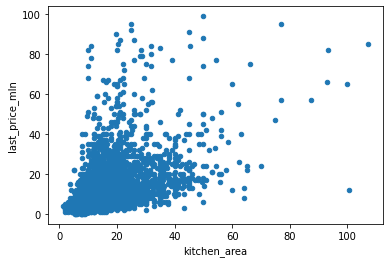

In [ ]:
#Анализурем зависит ли цена от площади кухни;;
data.plot(x='kitchen_area', y='last_price_mln', kind='scatter')
print(data['last_price_mln'].corr(data['kitchen_area']))

Есть корреляция между площадью кухни и ценой. т.е. при увеличение площади растет и стоимость. Но корреляция заметно ниже, чем в случае с общей площадью и жилой площадью

0.472530173054364


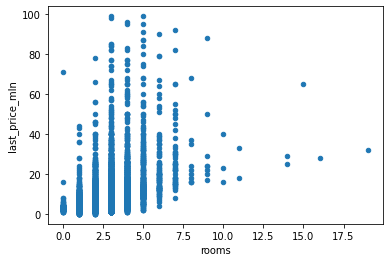

In [ ]:
#Анализурем зависит ли цена от количества комнат;
data.plot(x='rooms', y='last_price_mln', kind='scatter')
print(data['last_price_mln'].corr(data['rooms']))

Есть невысокая корреляция между кол-ом комнат и ценой.

<AxesSubplot:xlabel='floor_type'>

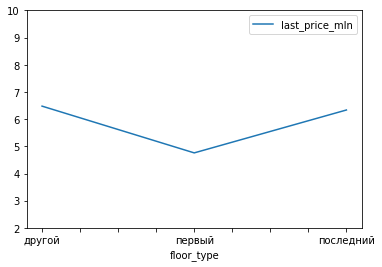

In [ ]:
#аналищиурем корреляцию этажа, на котором расположена квартира (первый, последний, другой) и стоимости.
data.pivot_table(index = 'floor_type', values = 'last_price_mln',aggfunc='mean').plot(ylim =(2,10))


Кваритиры на первых этажах проседают по цене в среднем. Квартиры на последнем этаже и других эатажах имееют схожую ср. цену

<AxesSubplot:xlabel='year'>

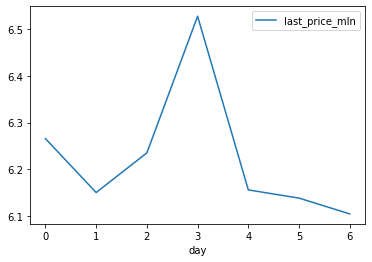

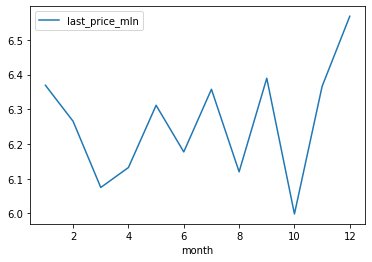

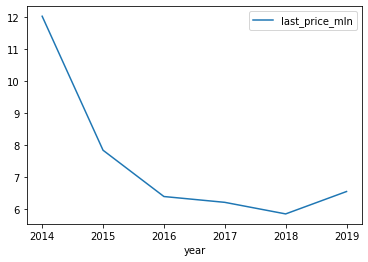

In [ ]:
#анализируем даты размещения (день недели, месяц, год).
data.pivot_table(index = 'day', values = 'last_price_mln').plot()
data.pivot_table(index = 'month', values = 'last_price_mln').plot()
data.pivot_table(index = 'year', values = 'last_price_mln').plot()

По четвергам ставят самую высокую цену.
Наиболее высокая цена выствляется на квартиры в январе, мае, июле , сентябре и максимальная цена в декабре.
За последние несколько лет с 2014 по 2018 цена объектов снижалась, в 2019 цена стала восстанавливаться

In [ ]:
#Считаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
locality_m2cost =data.pivot_table(index = 'locality_name', values = 'metr_cost', aggfunc = ['count','mean'])
locality_m2cost.columns= ['count', 'mean']
display(locality_m2cost.sort_values('count',ascending = False).head(10))

,count,mean
locality_name,,
Санкт-Петербург,14489,210436.275921
посёлок Мурино,491,174755.363030
посёлок Шушары,402,155381.178362
Всеволожск,371,133545.020946
Пушкин,345,192254.113967
Колпино,328,132023.061774
посёлок Парголово,301,200718.185634
Гатчина,292,121748.694097
деревня Кудрово,262,188187.004886


Наибольшее количество объявлений и самая высокая цена кв м2 в самом городе Санкт-Петербург, следующими локациями с точки коичесвта объектов идут Мурино и Шушары. по цене в топ 3 входят  Санкт-Петербург, посёлок Парголово и Пушкин.

<AxesSubplot:xlabel='center_km'>

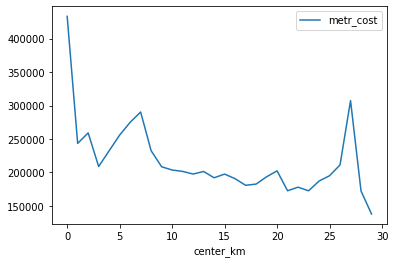

In [ ]:
#Выделем квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра
data.query('locality_name == "Санкт-Петербург"').pivot_table(
    index = 'center_km' , values = 'metr_cost' , aggfunc = 'mean' ).plot()



### Вывод

Для сервиса Яндекс Недвижимость было проведено исследование архива объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
В анализе данных участвовало 23699 объявления. В процессе переработки данных было произведено частичное восстановеление данных, преобразование и добавление новых переменных.
С помощью полученных данных удалось выявить ряд особенностей и закономерностей.



# 1 наиболее частые в продаже объекты:

* Наибольшее количество объектов имеют площадь 50-60 м2, таких объявлений более 8 тыс
* Наибольшее кол-во объектов имеют жилую площадь в диапозоне 20-40 м2,
* Для большинства объявлений средняя площадь кухни находится в диапозоне от 9 до 10 метров
* В основном это 1 и 2 квартиры


# 2 ценовые характеристики:

* Средняя стоимость квартиры в районе Санкт-Петербурга составляет 5 млн
* Топ 3 локации по стоимости м2 : Санкт-Петербург, посёлок Парголово и Пушкин
* Самая низкая цена м2 (в топ10 локаций по количеству объявлений) в Гатчине
* Квартиры на первых этажах проседают по цене в среднем. Квартиры на последнем этаже и других этажах имеют схожую ср. цену


# 3  временные характеристики:

* Наиболее высокая цена выставляется на квартиры в январе, мае, июле , сентябре и максимальная цена в декабре.
* За последние несколько лет с 2014 по 2018 цена объектов снижалась, в 2019 цена стала восстанавливаться
* Наиболее часто объявления публикуются по четвергам. Меньше всего по понедельникам.


# 4 корреляция данных:

* выявлена высокая корреляция между площадью квартиры и ценой. т.е. при увеличение площади растет и стоимость.
* выявлена высокая корреляция между жилой площадью квартиры и ценой. т.е. при увеличение площади растет и стоимость.
* количество комнат и площадь кухни обладают более низкой корреляцией с ценой недвижимости



# Общий вывод:
Объем данных является достаточным для формирования общих выводом и построения взаимосвязей, но для более глубокого анализа необходимо добавление дополнительных данных, например адрес локации, тип дома и состояние квартиры. Добавление таких данных позволило бы сгруппировать данные по новым критериям и получить более развернутый анализ.